<a href="https://colab.research.google.com/github/ganeevsingh18/ML_Assignment/blob/main/Ganeev_2021389.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Downloading given dataset into colab from Kaggle**


1. Installed library Kaggle

In [ ]:
!pip install kaggle

2. Mounted the drive aka connected this colab notebook with the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3. Made a local directory that expires with runtime, Uploaded the API key into the local directory

Chmod is a UNIX command to change permissions for the local directly, 600 implies only owner of file can read this file and no other person


In [ ]:
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/Ml/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

4. Downloaded the dataset from Kaggle

In [ ]:
!kaggle datasets download -d kumarvishal88/ml-assignment-1-datasets

 94% 47.0M/50.1M [00:02<00:00, 32.9MB/s]
100% 50.1M/50.1M [00:02<00:00, 20.8MB/s]


5. Unzipping the zipped file

In [ ]:
!unzip ml-assignment-1-datasets.zip

Archive:  ml-assignment-1-datasets.zip
  inflating: AUDIO_DATA/AUDIO_DATA/CLASS 1/0005.wav  
  inflating: AUDIO_DATA/AUDIO_DATA/CLASS 1/0007.wav  
  inflating: AUDIO_DATA/AUDIO_DATA/CLASS 1/0011.wav  
  inflating: AUDIO_DATA/AUDIO_DATA/CLASS 1/0012.wav  
  inflating: AUDIO_DATA/AUDIO_DATA/CLASS 1/0014.wav  
  inflating: AUDIO_DATA/AUDIO_DATA/CLASS 1/0015.wav  
  inflating: AUDIO_DATA/AUDIO_DATA/CLASS 1/0020.wav  
  inflating: AUDIO_DATA/AUDIO_DATA/CLASS 1/0022.wav  
  inflating: AUDIO_DATA/AUDIO_DATA/CLASS 1/0023.wav  
  inflating: AUDIO_DATA/AUDIO_DATA/CLASS 1/speech-librivox-0053.wav  
  inflating: AUDIO_DATA/AUDIO_DATA/CLASS 2/0069.wav  
  inflating: AUDIO_DATA/AUDIO_DATA/CLASS 2/0071.wav  
  inflating: AUDIO_DATA/AUDIO_DATA/CLASS 2/0072.wav  
  inflating: AUDIO_DATA/AUDIO_DATA/CLASS 2/0074.wav  
  inflating: AUDIO_DATA/AUDIO_DATA/CLASS 2/0080.wav  
  inflating: AUDIO_DATA/AUDIO_DATA/CLASS 2/0084.wav  
  inflating: AUDIO_DATA/AUDIO_DATA/CLASS 2/0089.wav  
  inflating: AUDIO_DATA/AUD

**IMAGE DATA**

**ANS 1: Find out if the dataset is imbalanced?**





In [ ]:
import os

def images_in_a_file(directory_path):
  image_count=0
  for filename in os.listdir(directory_path):
    if filename.lower().endswith(('.png','.jpeg')):
      image_count+=1
  return image_count

def images_per_file(folder_path):
  images={} #dictionary that contains file: images
  for subfolder_name in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subfolder_name)
    if os.path.isdir(subfolder_path):
        images[subfolder_name]=images_in_a_file(subfolder_path)
  return images

class_counts=images_per_file('/content/IMAGE_DATA/IMAGE_DATA')
print(class_counts)


{'RANDOM': 20, 'AIRPLANE': 20, 'ROBOTS': 21, 'CARS': 20, 'ELEPHANTS': 39}


I have created a dictionary that contains the classes and amount of images present for each class

In [ ]:

minority_class = min(class_counts, key=class_counts.get)
majority_class = max(class_counts, key=class_counts.get)

minority_count = class_counts[minority_class]
majority_count = class_counts[majority_class]

imbalance_ratio = minority_count / majority_count

print(f"Minority Class: {minority_class}")
print(f"Majority Class: {majority_class}")
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

Minority Class: RANDOM
Majority Class: ELEPHANTS
Imbalance Ratio: 0.51


Since the imabalance ratio is greater than 0.1, The dataset is indeed imbalanced

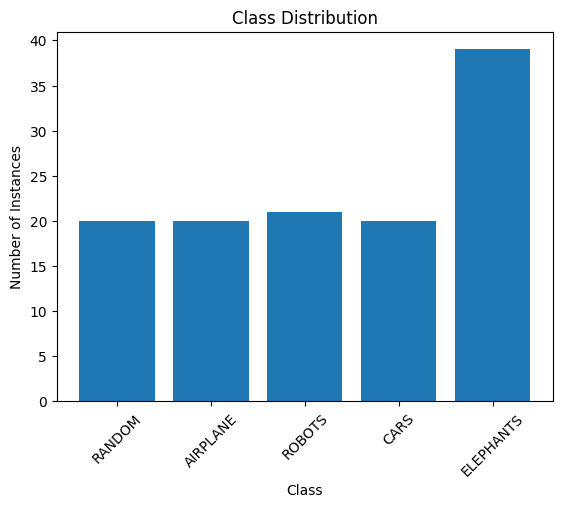

In [ ]:
import matplotlib.pyplot as plt
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

to balance the dataset we can do either:
1. Random Undersampling:
Randomly remove instances from Majority class whch is "Elephants" class in this case
2. Random Oversampling
Randomly duplicate instances from Minority classes whch are "Cars","Random","Airplanes" and "Robots" in this case

**ANS 2: Randomly take 8 images from entire dataset and plot there respective histograms and label the class.**





In [ ]:
def get_subdirectories(folder_path):
    subdirectories = []
    for subfolder_name in os.listdir(folder_path):
      subfolder_path = os.path.join(folder_path, subfolder_name)
      if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
          subdirectories.append([os.path.join(subfolder_path, filename),subfolder_name])
    return subdirectories


top_folder = '/content/IMAGE_DATA/IMAGE_DATA'  # Replace with your actual path
subdirectories_list = get_subdirectories(top_folder)

print(len(subdirectories_list))

120


added all the directories of images into a list: subdirectories list

In [ ]:
import random

seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)

# Pick 8 random values from the shuffled list
random_values = random.sample(subdirectories_list, 8)

print(random_values)


[['/content/IMAGE_DATA/IMAGE_DATA/ROBOTS/images (8).jpeg', 'ROBOTS'], ['/content/IMAGE_DATA/IMAGE_DATA/ELEPHANTS/images (18).jpeg', 'ELEPHANTS'], ['/content/IMAGE_DATA/IMAGE_DATA/CARS/images (18).jpeg', 'CARS'], ['/content/IMAGE_DATA/IMAGE_DATA/ELEPHANTS/images (37).jpeg', 'ELEPHANTS'], ['/content/IMAGE_DATA/IMAGE_DATA/ELEPHANTS/images (19).jpeg', 'ELEPHANTS'], ['/content/IMAGE_DATA/IMAGE_DATA/ELEPHANTS/images (8).jpeg', 'ELEPHANTS'], ['/content/IMAGE_DATA/IMAGE_DATA/ELEPHANTS/images (29).jpeg', 'ELEPHANTS'], ['/content/IMAGE_DATA/IMAGE_DATA/RANDOM/images (13).png', 'RANDOM']]


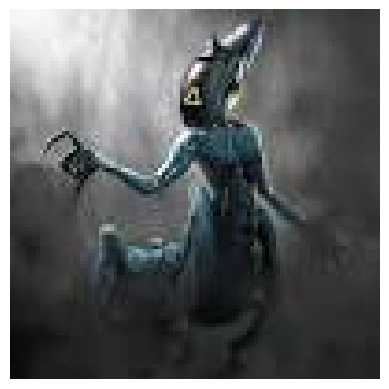

None


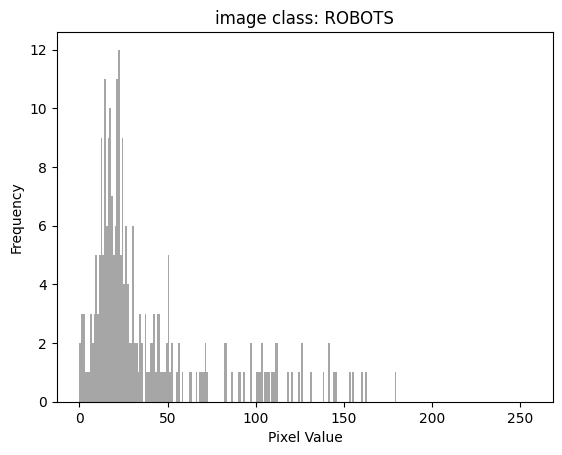

None


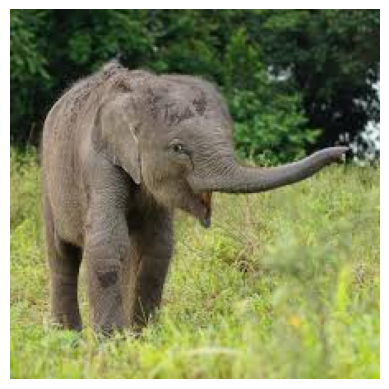

None


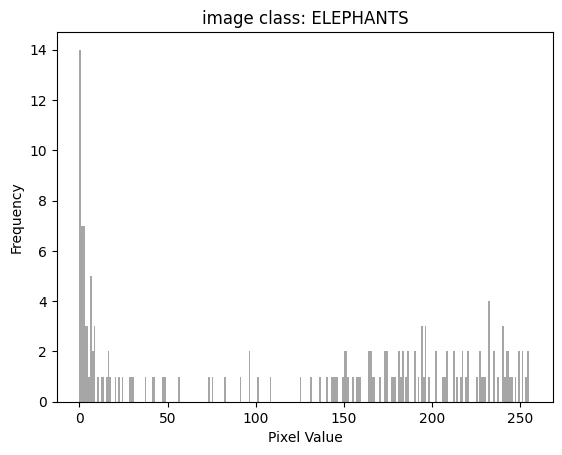

None


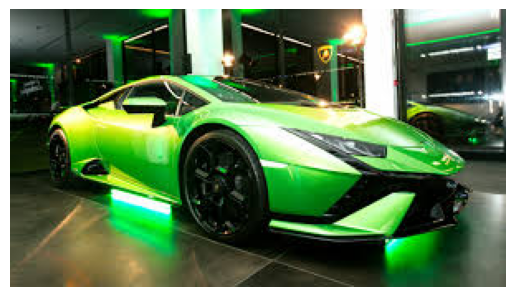

None


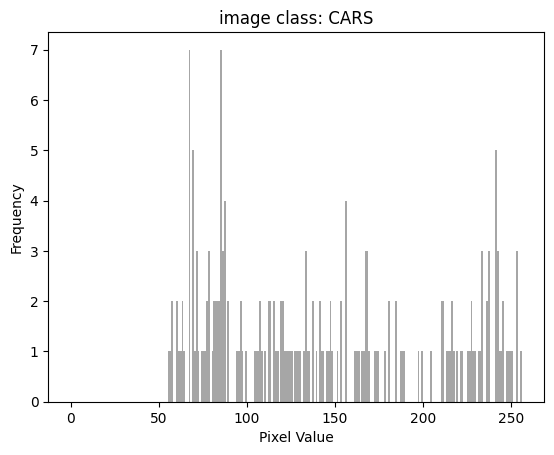

None


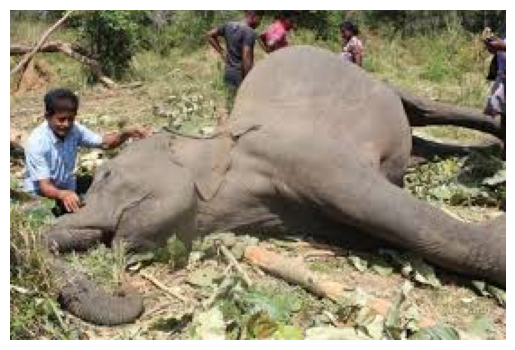

None


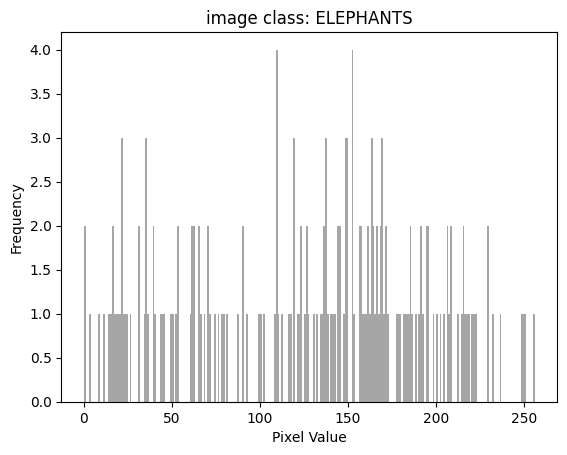

None


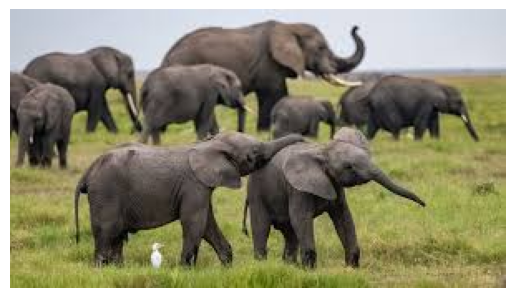

None


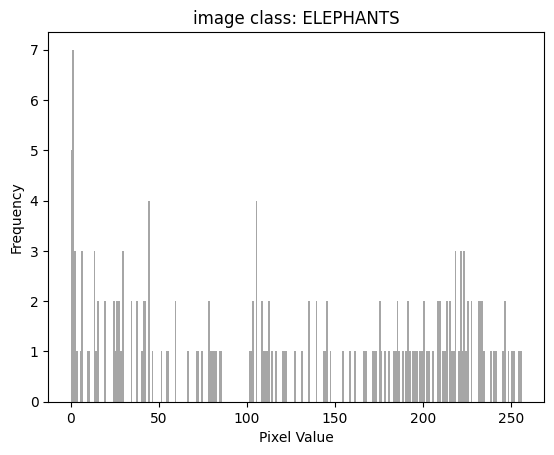

None


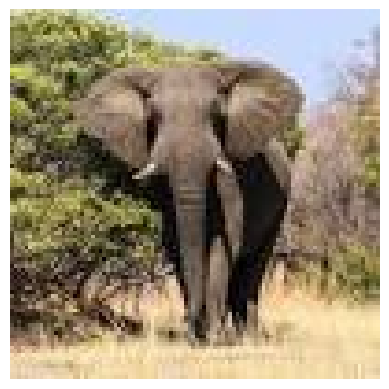

None


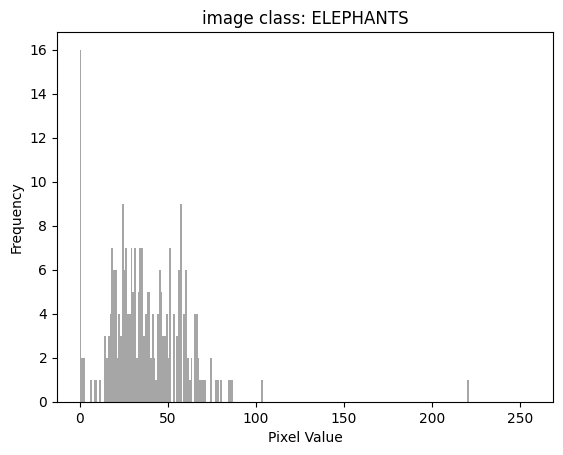

None


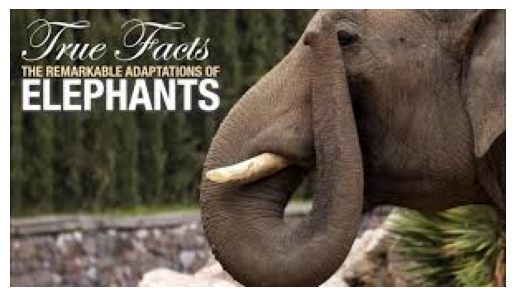

None


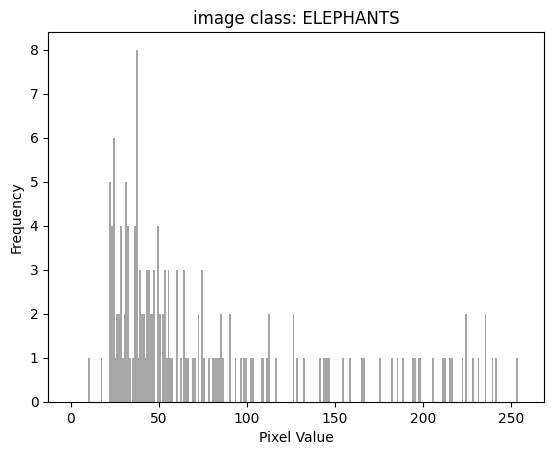

None


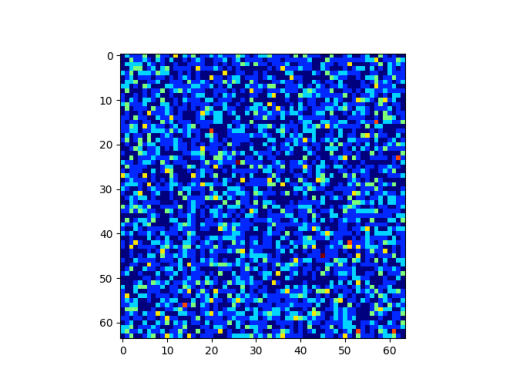

None


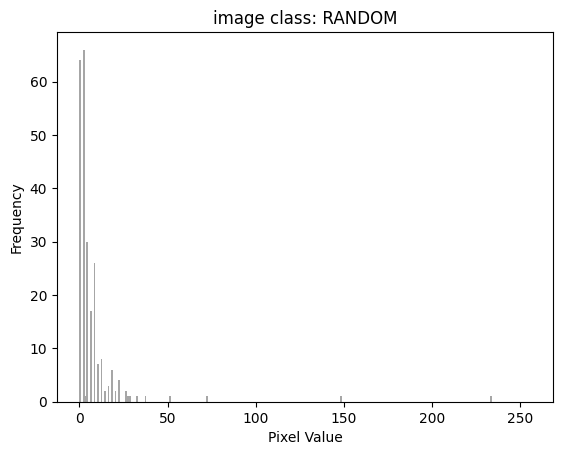

None


In [ ]:
from PIL import Image

def create_histogram(path_and_class):
  image_path=path_and_class[0]
  image_class=path_and_class[1]

  image = Image.open(image_path)
  image = image.convert("L")  # Convert to grayscale if needed
  histogram = image.histogram()

  plt.figure()
  plt.title(f'image class: {image_class}')
  plt.xlabel("Pixel Value")
  plt.ylabel("Frequency")
  plt.hist(histogram, bins=256, range=(0, 256), color='gray', alpha=0.7)
  plt.show()

def display_image(path_and_class):
  image_path=path_and_class[0]
  image = Image.open(image_path)
  plt.imshow(image)
  plt.axis("off")
  plt.show()

for values in random_values:

  print(display_image(values))
  print(create_histogram(values))



**ANS 3: Find and show mean and variance of each class**

In [ ]:
dict={}
for lists in subdirectories_list:
  if lists[1] not in dict:
    dict[lists[1]]=[]
    dict[lists[1]].append(lists[0])
  else:
    dict[lists[1]].append(lists[0])
print(dict)


{'ROBOTS': ['/content/IMAGE_DATA/IMAGE_DATA/ROBOTS/images (6).jpeg', '/content/IMAGE_DATA/IMAGE_DATA/ROBOTS/images (2).jpeg', '/content/IMAGE_DATA/IMAGE_DATA/ROBOTS/images (3).jpeg', '/content/IMAGE_DATA/IMAGE_DATA/ROBOTS/images (1).jpeg', '/content/IMAGE_DATA/IMAGE_DATA/ROBOTS/images (20).jpeg', '/content/IMAGE_DATA/IMAGE_DATA/ROBOTS/images (9).jpeg', '/content/IMAGE_DATA/IMAGE_DATA/ROBOTS/images (13).jpeg', '/content/IMAGE_DATA/IMAGE_DATA/ROBOTS/images (19).jpeg', '/content/IMAGE_DATA/IMAGE_DATA/ROBOTS/images (4).jpeg', '/content/IMAGE_DATA/IMAGE_DATA/ROBOTS/images (17).jpeg', '/content/IMAGE_DATA/IMAGE_DATA/ROBOTS/images (15).jpeg', '/content/IMAGE_DATA/IMAGE_DATA/ROBOTS/images (5).jpeg', '/content/IMAGE_DATA/IMAGE_DATA/ROBOTS/images (16).jpeg', '/content/IMAGE_DATA/IMAGE_DATA/ROBOTS/images (7).jpeg', '/content/IMAGE_DATA/IMAGE_DATA/ROBOTS/images (8).jpeg', '/content/IMAGE_DATA/IMAGE_DATA/ROBOTS/images (1).png', '/content/IMAGE_DATA/IMAGE_DATA/ROBOTS/images (18).jpeg', '/content/IMA

In [ ]:
import numpy as np

path=subdirectories_list[0][0]

image = Image.open(path)
images_array = np.array(image)
print(np.mean(images_array))

print(images_array)

220.84006666666667
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [ ]:
import numpy as np
import math

def mean_and_variance(path_list):
  mean=[]
  variance=[]
  for path in path_list:
    image = Image.open(path)
    images_array = np.array(image)
    mean.append(np.mean(images_array))
  return np.mean(np.array(mean)),np.var(np.array(mean))

mean_and_variance(dict["ROBOTS"])


for key in dict:
  mean,variance=mean_and_variance(dict[key])
  print(f'mean for class {key} is {mean}')
  print(f'std deviation for class {key} is {math.sqrt(variance)}')
  print("\n")

mean for class ROBOTS is 145.92618378136393
std deviation for class ROBOTS is 53.066865782353126


mean for class CARS is 109.04072142421482
std deviation for class CARS is 47.692807285433254


mean for class RANDOM is 199.22800956217446
std deviation for class RANDOM is 1.1793224450007909


mean for class ELEPHANTS is 126.34140112443296
std deviation for class ELEPHANTS is 40.49873046349103


mean for class AIRPLANE is 126.3280303586831
std deviation for class AIRPLANE is 48.17827593014285




WHAT CAN U DEDUCE FROM THE GIVEN DATA?
The mean pixel value gives me an idea of overall brightness of the images. A higher mean value suggests brighter images, while a lower mean value suggests darker images.

The variance of pixel values indicates the spread or distribution of pixel intensities. A higher variance suggests a wider range of pixel values, which can imply higher contrast images, while a lower variance might indicate lower contrast images.

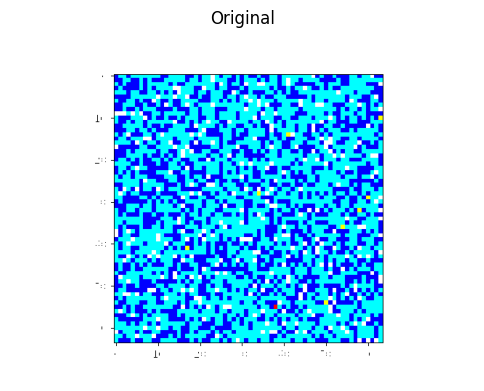

None


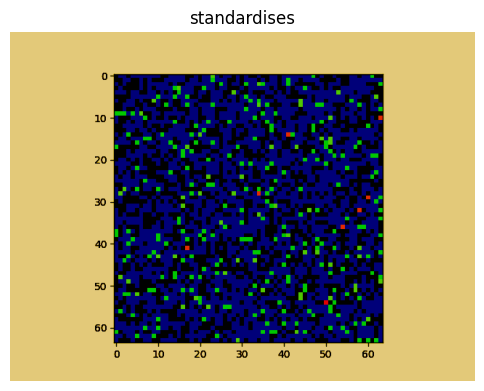

None


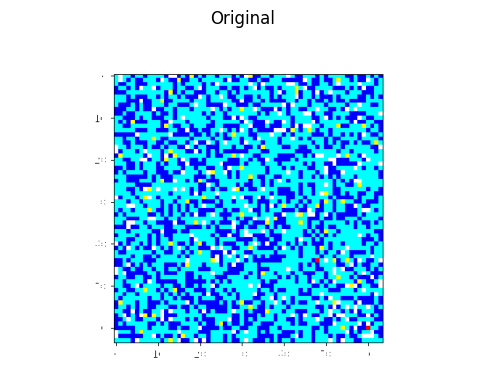

None


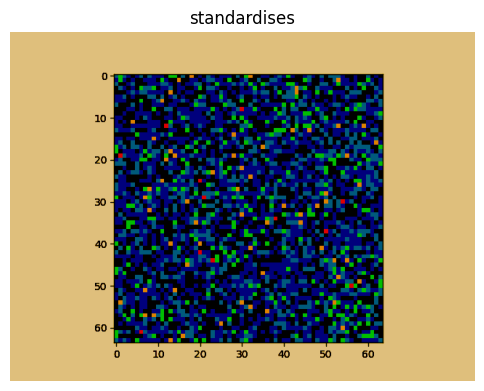

None


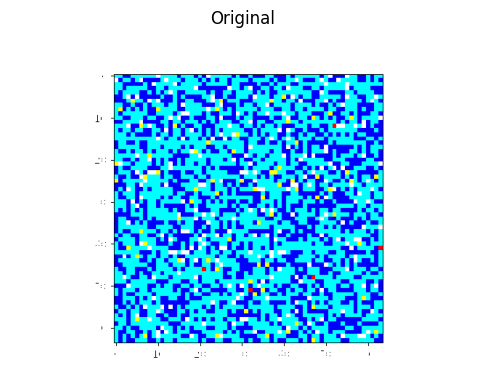

None


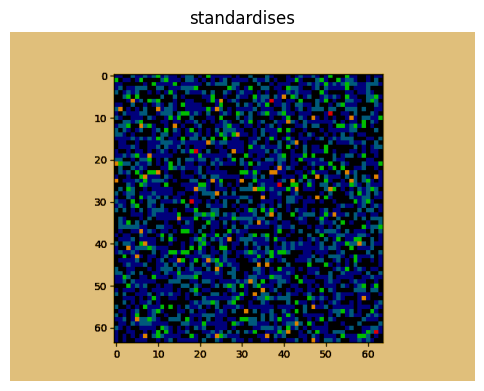

None


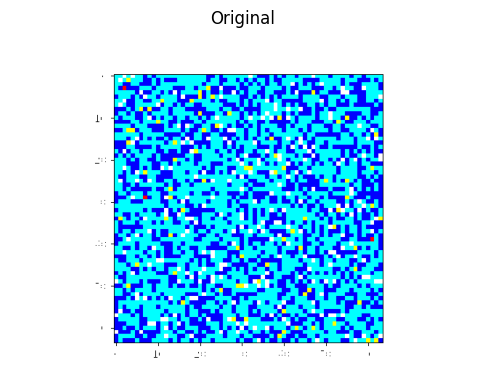

None


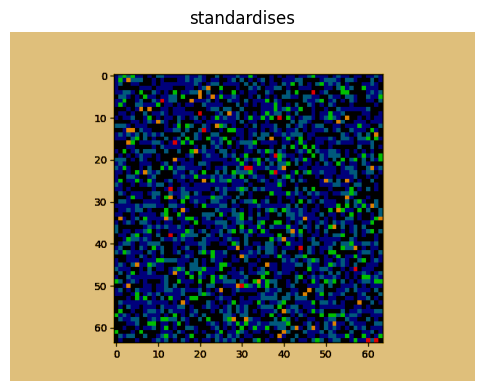

None


In [ ]:
from scipy.stats import zscore

def display_image(image_array, cmap='viridis', title=None):
    plt.figure(figsize=(6, 6))
    plt.imshow(image_array, cmap=cmap)

    if title:
        plt.title(title)

    plt.axis('off')
    plt.show()

image_path=dict["RANDOM"][0]

def standardize_image(image_path):

    image=Image.open(image_path)
    image_array = np.array(image, dtype=np.float32)

    print(display_image(image_array,title="Original"))
    mean = np.mean(image_array,axis = (0, 1))
    std = np.std(image_array,axis = (0, 1))
    # standardized_image = (image_array - mean) / std

    image_array[:, :, 0] = (image_array[:, :, 0] - mean[0]) / std[0]
    image_array[:, :, 1] = (image_array[:, :, 1] - mean[1]) / std[1]
    image_array[:, :, 2] = (image_array[:, :, 2] - mean[2]) / std[2]

    print(display_image(image_array,title="standardises"))

    return image_array


#to pick 4 random values from class "RANDOM"
random.shuffle(dict["RANDOM"])
random_values = random.sample(dict["RANDOM"], 4)

for values in random_values:
  # print(values)
  standardize_image(values)



OBSERVATION
 The colours of the image has changed

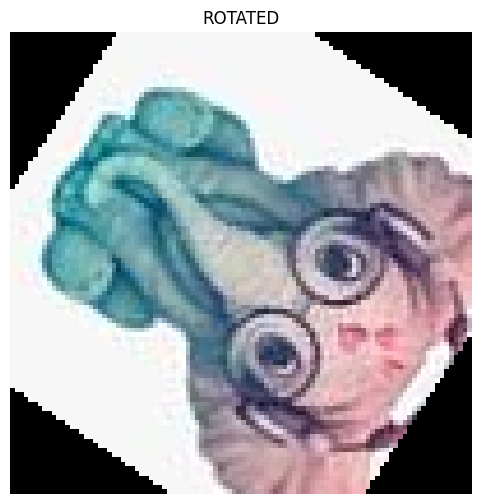

None


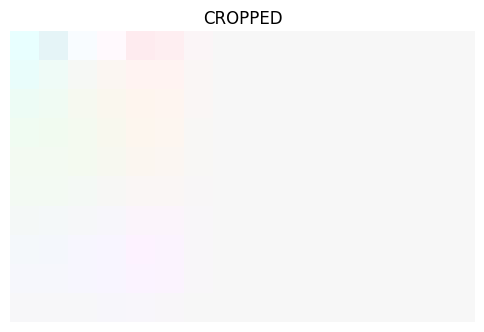

None


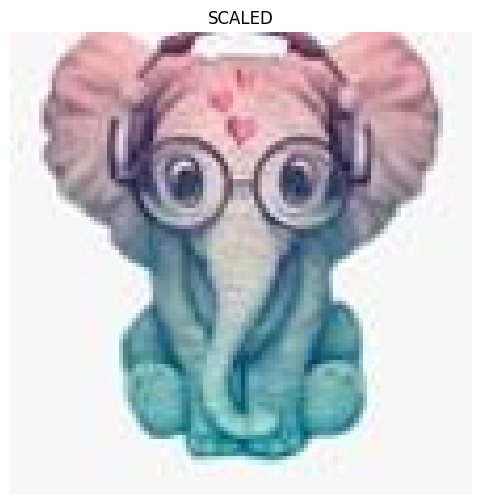

None


In [ ]:
def rotation(image_path):
  original_image = Image.open(image_path)
  rotation_angle = np.random.uniform(-180, 180)

  rotated_image = original_image.rotate(rotation_angle, resample=Image.BICUBIC)
  # we use BICUBIC image to maintain quality
  print(display_image(rotated_image,title="ROTATED"))

def crop(image_path):
  image = Image.open(image_path)

  image_width, image_height = image.size
  crop_left = np.random.randint(0, image_width-6)
  crop_right = np.random.randint(crop_left+6, image_width)
  crop_top = np.random.randint(0, image_height-6)
  crop_bottom = np.random.randint(crop_top+6, image_height)

  cropped_image = image.crop((crop_left, crop_top,crop_right,crop_bottom))
  print(display_image(cropped_image,title="CROPPED"))


def scale(image_path):
    image = Image.open(image_path)
    scale_range = (0.5, 1.5)

    scale_factor = np.random.uniform(scale_range[0], scale_range[1])
    new_width = int(image.width * scale_factor)
    new_height = int(image.height * scale_factor)
    scaled_image = image.resize((new_width, new_height), resample=Image.BICUBIC)

    print(display_image(scaled_image,title="SCALED"))

path=dict["ELEPHANTS"][0]
rotation(path)
crop(path)
scale(path)

**TEXT DATA**

1. Find average text length of English and Hindi corpus (including whitespace, punctuations etc.)

In [ ]:
import csv



import pandas as pd

# Read the CSV file into a pandas DataFrame
csv_file_path = '/content/TEXT_DATA/TEXT_DATA/Hindi_English_parallel.csv'
data = pd.read_csv(csv_file_path)

# Calculate the mean character length for the "english" and "hindi" columns
english_mean = data['english_sentence'].str.len().mean()
hindi_mean = data['hindi_sentence'].str.len().mean()

print(f"Mean character length in English column: {english_mean}")
print(f"Mean character length in Hindi column: {hindi_mean}")



Mean character length in English column: 89.60715974865431
Mean character length in Hindi column: 86.28161773813947


2. Randomly select 20 parallel texts and remove puctuations and special characters.

In [ ]:

random_rows = data.sample(n=20)

def remove_punctuation(text):
    cleaned_text = ''.join(c for c in text if c.isalnum() or c.isspace())
    return cleaned_text

random_rows['english_sentence'] = random_rows['english_sentence'].apply(remove_punctuation)
random_rows['hindi_sentence'] = random_rows['hindi_sentence'].apply(remove_punctuation)


print(f"english sentences without punctuation: \n\n{random_rows['english_sentence']}")
print(f"\n\n hindi sentences without punctuation: \n\n{random_rows['hindi_sentence']}")


english sentences without punctuation: 

170001                    This lake is on an elevated land 
154861          The idol of the God is made of black stone 
146242    If you are to believe the specialists then eve...
91669                                            Masoor pak
48255                                           we numb joy
45589     But so far  no inspectors are being sent out t...
105163    Many persons from other religions also got con...
149375    If patient leads his life in moderation then h...
20246                                You know what it means
109332    Taj Mahal was made on a small plateau on the s...
177052    Among Hindus there is a ritual of taking a bat...
121404    He was more interested in organising debates  ...
68494     The main part of the temple beyond consists of...
63800                                        UnionTerritory
60559     As a responsible  nationally conscious party o...
163712    Havelis of Vadanagar and Gates made in Solanki...

 3. Randomly select 50 parallel texts and make dictionary for both english and hindi corpus. (Here dictionary means a key-value mapping where key is word and value is a unique number, no two keys can have same number)


In [ ]:
random_rows = data.sample(n=50)

random_rows['english_sentence'] = random_rows['english_sentence'].apply(remove_punctuation)
random_rows['hindi_sentence'] = random_rows['hindi_sentence'].apply(remove_punctuation)

english_sentences = random_rows['english_sentence'].tolist()
hindi_sentences = random_rows['hindi_sentence'].tolist()

english_words = ' '.join(english_sentences).split()
hindi_words = ' '.join(hindi_sentences).split()

english_dict = {}
hindi_dict = {}

english_count = 0
hindi_count = 0

for word in english_words:
    if word not in english_dict:
        english_dict[word] = english_count
        english_count += 1

for word in hindi_words:
    if word not in hindi_dict:
        hindi_dict[word] = hindi_count
        hindi_count += 1

print("English Dictionary:")
for word, idx in english_dict.items():
    print(f"{word}: {idx}")

print("\nHindi Dictionary:")
for word, idx in hindi_dict.items():
    print(f"{word}: {idx}")

English Dictionary:
The: 0
provisions: 1
are: 2
not: 3
only: 4
considered: 5
procedural: 6
safeguards: 7
but: 8
great: 9
constitutional: 10
rights: 11
He: 12
is: 13
a: 14
very: 15
tough: 16
man: 17
should: 18
an: 19
experimental: 20
change: 21
in: 22
the: 23
laws: 24
of: 25
his: 26
sport: 27
be: 28
ratified: 29
he: 30
will: 31
have: 32
to: 33
become: 34
even: 35
tougher: 36
One: 37
can: 38
also: 39
see: 40
IndoSaracenic: 41
style: 42
architecture: 43
Gateway: 44
India: 45
Our: 46
Constitution: 47
guarantees: 48
certain: 49
fundamental: 50
under: 51
article: 52
32: 53
it: 54
right: 55
move: 56
highest: 57
court: 58
land: 59
directly: 60
by: 61
appropriate: 62
proceedings: 63
for: 64
enforcement: 65
She: 66
was: 67
subjected: 68
ridicule: 69
front: 70
pages: 71
newspapers: 72
It: 73
true: 74
that: 75
I: 76
ought: 77
know: 78
consequences: 79
my: 80
acts: 81
Congress: 82
has: 83
clearly: 84
laid: 85
down: 86
principle: 87
which: 88
must: 89
govern: 90
our: 91
action: 92
times: 93
world: 9

Find 10 most occuring words and plot there histogram with labels.

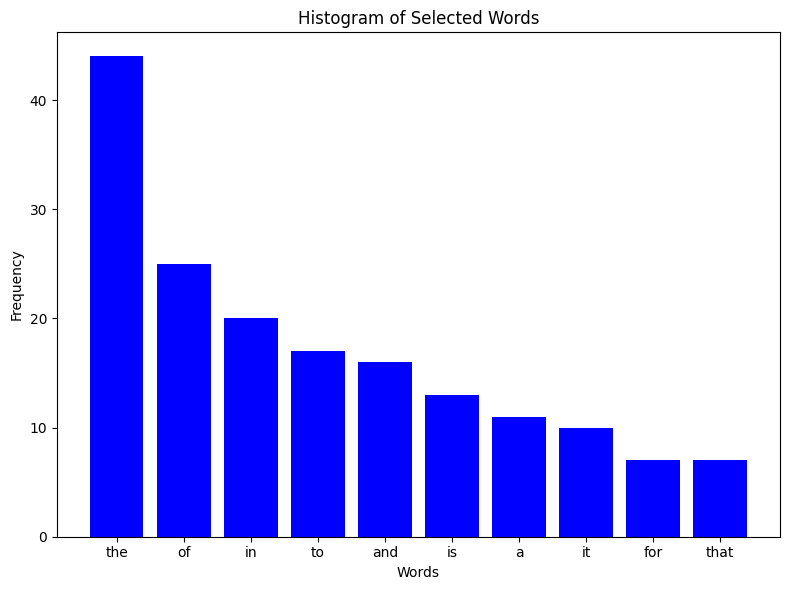

In [ ]:
frequency_dict={}

for word in english_words:
  # print(word)
  if(word not in frequency_dict):
    frequency_dict[word]=1
  else:
    frequency_dict[word]+=1

# print(frequency_dict)

top_numbers = sorted(frequency_dict, key=frequency_dict.get, reverse=True)[:10]
# print(top_numbers)

# Get the corresponding words and frequencies for the top numbers


# Print the top words with frequencies
# print("Top 10 Words with Frequencies:")
# for word in top_numbers:
#     print(f"{word}: {frequency_dict[word]}")

words_for_histogram = top_numbers
selected_frequencies = [frequency_dict[word] for word in words_for_histogram]

plt.figure(figsize=(8, 6))
plt.bar(words_for_histogram, selected_frequencies, color='blue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Histogram of Selected Words')
plt.tight_layout()
plt.show()

**AUDIO DATA**

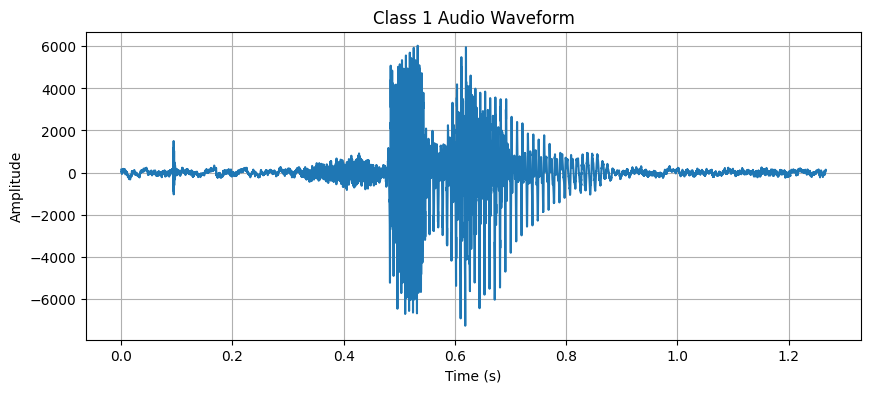

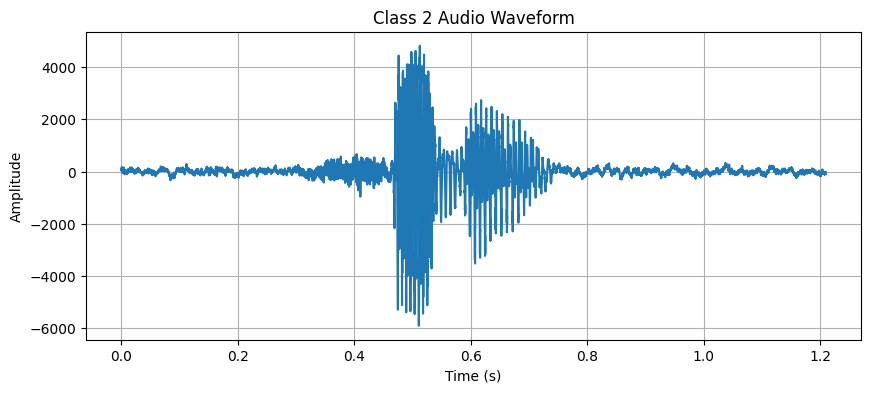

In [ ]:
import wave
import numpy as np
import matplotlib.pyplot as plt


class1_wav_path = "/content/AUDIO_DATA/AUDIO_DATA/CLASS 1/0005.wav"
class2_wav_path = "/content/AUDIO_DATA/AUDIO_DATA/CLASS 1/0007.wav"


def read_wav_file(file_path):
    with wave.open(file_path, 'rb') as wav_file:
        num_frames = wav_file.getnframes()
        sample_width = wav_file.getsampwidth()
        frame_rate = wav_file.getframerate()
        num_channels = wav_file.getnchannels()

        audio_data = np.frombuffer(wav_file.readframes(num_frames), dtype=np.int16)

    return audio_data, num_channels, frame_rate


class1_audio, class1_channels, class1_frame_rate = read_wav_file(class1_wav_path)
class2_audio, class2_channels, class2_frame_rate = read_wav_file(class2_wav_path)



def plot_waveform(audio_data, title):
    time_axis = np.arange(len(audio_data)) / class1_frame_rate
    plt.figure(figsize=(10, 4))
    plt.plot(time_axis, audio_data)
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.show()

plot_waveform(class1_audio, "Class 1 Audio Waveform")
plot_waveform(class2_audio, "Class 2 Audio Waveform")


made a dictionary that contains {class_name: [paths in the class]}

In [ ]:
def get_folder_file_paths(directory_path):
  folder_file_paths = {}

  for folder_name in os.listdir(directory_path):
    folder_path = os.path.join(directory_path, folder_name)
    if os.path.isdir(folder_path):
      folder_file_paths[folder_name] = []
      for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
          folder_file_paths[folder_name].append(file_path)

  return folder_file_paths

directory_path ='/content/AUDIO_DATA/AUDIO_DATA'
folder_file_paths = get_folder_file_paths(directory_path)

print(folder_file_paths)


{'CLASS 1': ['/content/AUDIO_DATA/AUDIO_DATA/CLASS 1/0020.wav', '/content/AUDIO_DATA/AUDIO_DATA/CLASS 1/0014.wav', '/content/AUDIO_DATA/AUDIO_DATA/CLASS 1/speech-librivox-0053.wav', '/content/AUDIO_DATA/AUDIO_DATA/CLASS 1/0023.wav', '/content/AUDIO_DATA/AUDIO_DATA/CLASS 1/0022.wav', '/content/AUDIO_DATA/AUDIO_DATA/CLASS 1/0011.wav', '/content/AUDIO_DATA/AUDIO_DATA/CLASS 1/0012.wav', '/content/AUDIO_DATA/AUDIO_DATA/CLASS 1/0007.wav', '/content/AUDIO_DATA/AUDIO_DATA/CLASS 1/0005.wav', '/content/AUDIO_DATA/AUDIO_DATA/CLASS 1/0015.wav'], 'CLASS 3': ['/content/AUDIO_DATA/AUDIO_DATA/CLASS 3/0339.wav', '/content/AUDIO_DATA/AUDIO_DATA/CLASS 3/in-the-forest-2-21402.mp3', '/content/AUDIO_DATA/AUDIO_DATA/CLASS 3/0348.wav', '/content/AUDIO_DATA/AUDIO_DATA/CLASS 3/dramatic-background-music-for-short-videos-1-minute-little-alicia-155718.mp3', '/content/AUDIO_DATA/AUDIO_DATA/CLASS 3/0342.wav', '/content/AUDIO_DATA/AUDIO_DATA/CLASS 3/forest-story-acoustic-ambient-background-music-9713.mp3', '/content/

1. Find mean audio length of each class and check for imbalance class if any, suggest methods to balance the dataset.

In [ ]:
import librosa

def class_mean(file_paths):
  audio_lengths = []

  for audio_path in file_paths:
    y, sr = librosa.load(audio_path)
    duration = librosa.get_duration(y=y, sr=sr)
    audio_lengths.append(duration)

  mean_audio_length = np.mean(audio_lengths)
  return mean_audio_length

class_count={}
for keys in folder_file_paths:
  class_count[keys]=class_mean(folder_file_paths[keys])

print(class_count)


{'CLASS 1': 21.973219954648528, 'CLASS 3': 49.5322477324263, 'CLASS 2': 1.8874739229024946, 'CLASS 5': 2.30243537414966, 'CLASS 4': 2.1691201814058956}


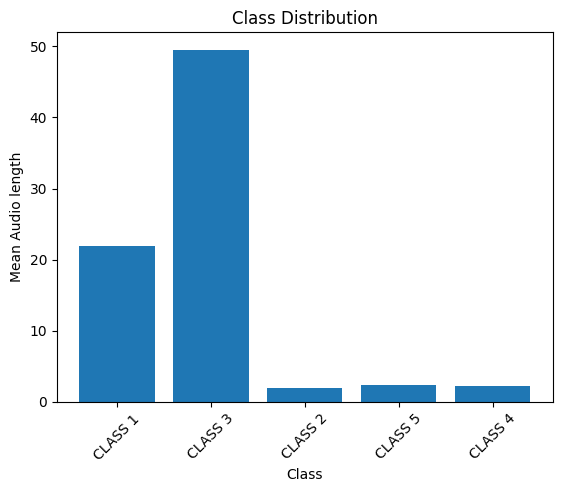

In [ ]:
import matplotlib.pyplot as plt
plt.bar(class_count.keys(), class_count.values())
plt.xlabel('Class')
plt.ylabel('Mean Audio length')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

In [ ]:
overall_mean_length = np.mean(list(class_count.values()))

# Check for class imbalance
imbalance_threshold = 0.8  # Set a threshold to consider a class imbalanced

for class_label, class_mean_length in class_count.items():
    imbalance_ratio = class_mean_length / overall_mean_length
    if imbalance_ratio < imbalance_threshold:
        print(f"Class {class_label} is imbalanced (imbalance ratio: {imbalance_ratio:.2f})")

Class CLASS 2 is imbalanced (imbalance ratio: 0.12)
Class CLASS 5 is imbalanced (imbalance ratio: 0.15)
Class CLASS 4 is imbalanced (imbalance ratio: 0.14)


to balance the dataset we can do either:

1. Random Downsampling: Remove some samples from the over-represented class to balance it with the under-represented class. This can lead to loss of information.
Random
2. Upsampling: Duplicate some samples from the under-represented class to balance it with the over-represented class. This can lead to overfitting.
A combination of both methods can be effective.

In [ ]:
dataset_paths = []
for class_paths in folder_file_paths.values():
  dataset_paths.extend(class_paths)



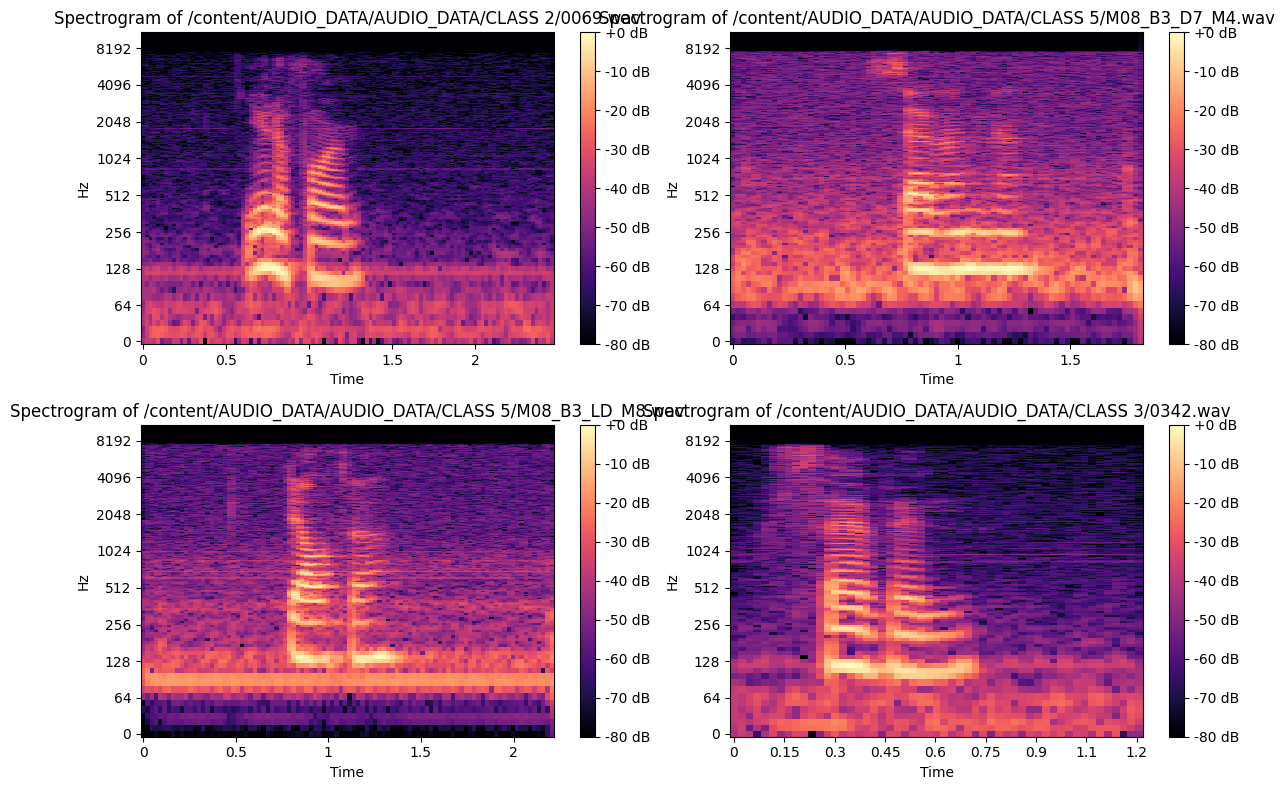

In [ ]:
random_selected = random.sample(dataset_paths, 4)

plt.figure(figsize=(12, 8))

for audio_path in random_selected:
  plt.subplot(2, 2, random_selected.index(audio_path) + 1)

  # Load audio and compute spectrogram
  y, sr = librosa.load(audio_path)
  D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

  # Display the spectrogram
  librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
  plt.colorbar(format='%+2.0f dB')
  plt.title(f"Spectrogram of {audio_path}")
  plt.tight_layout()

plt.show()

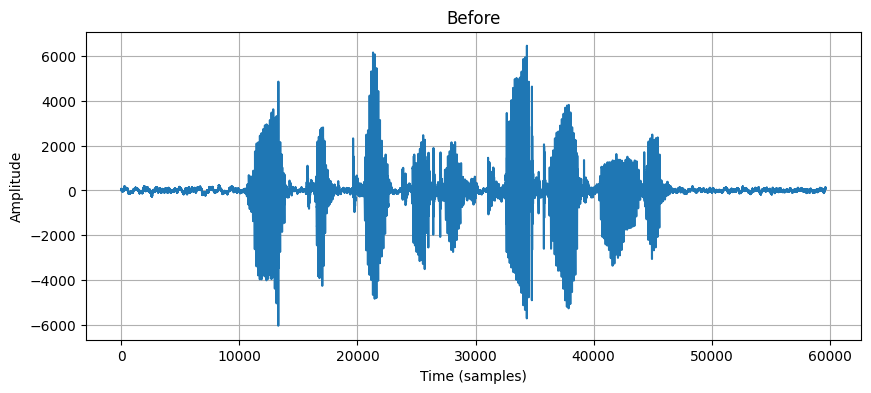

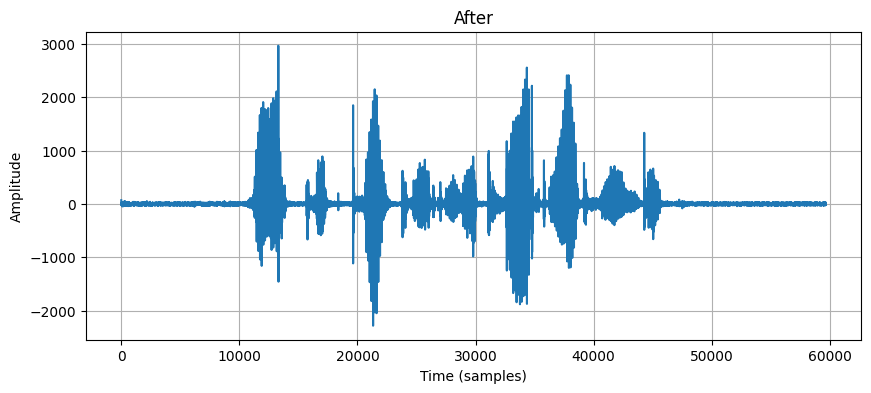

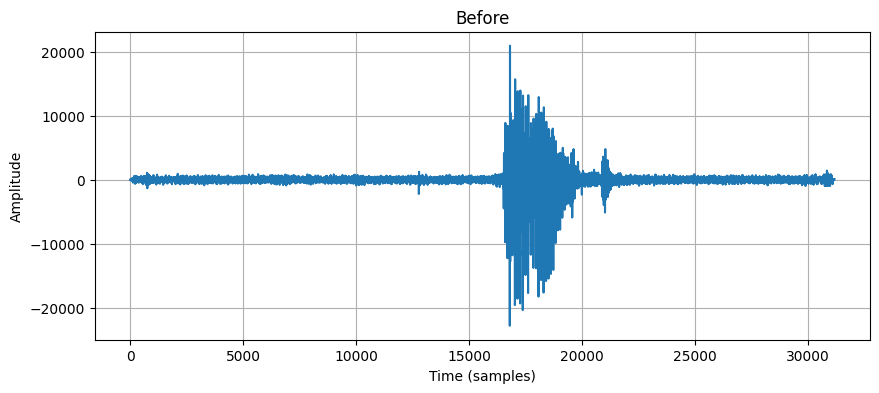

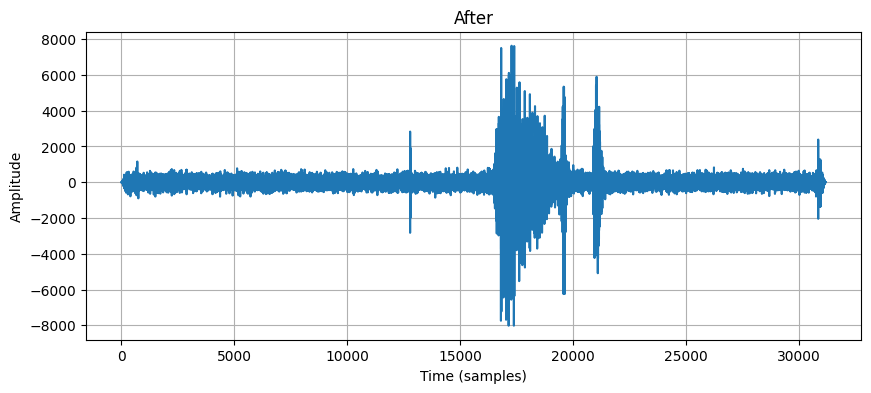

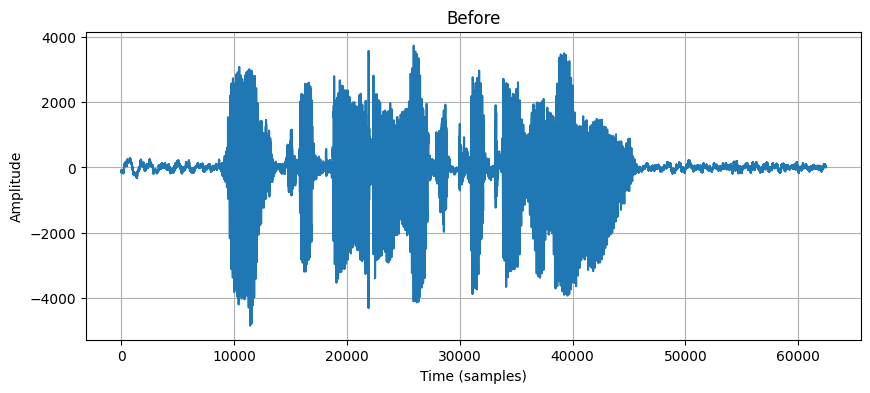

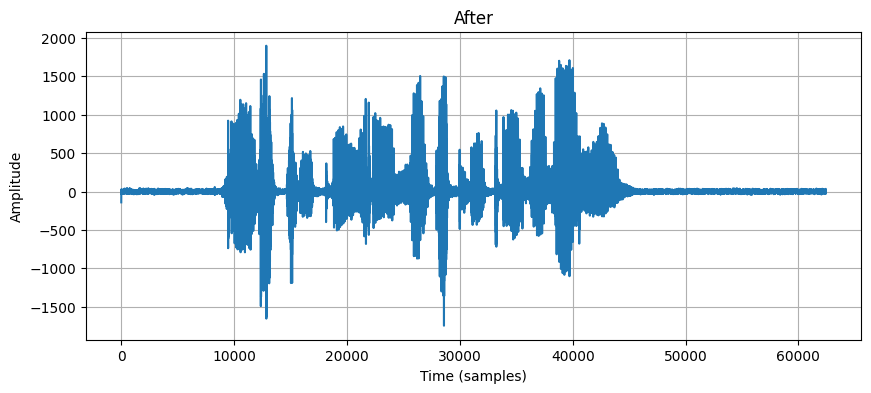

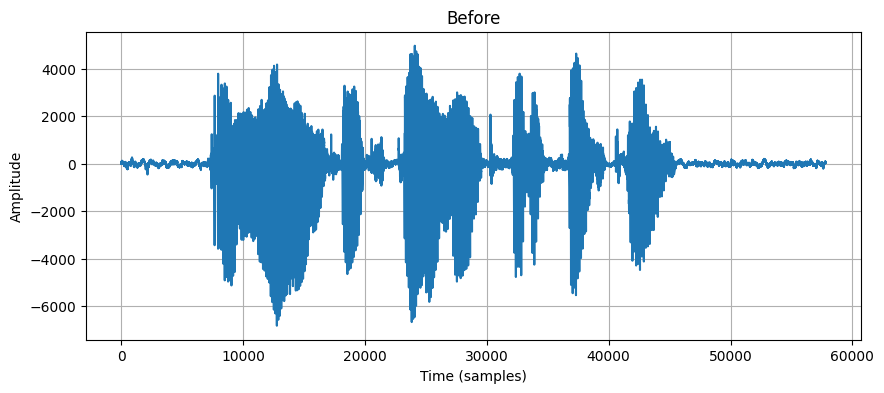

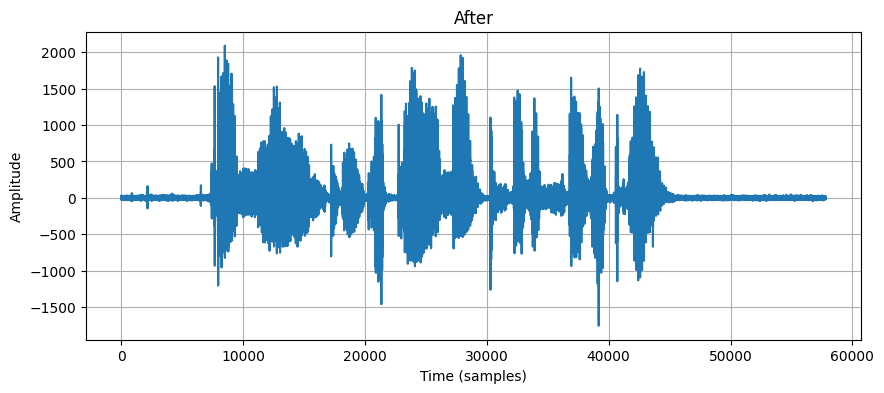

In [ ]:
random_selected = random.sample(dataset_paths, 4)
import scipy.io.wavfile

def helper(path):
  sampling_rate, signal = scipy.io.wavfile.read(path)
  emphasised_signal=pre_emphasis(signal)
  plot_time_domain(signal,title='Before')
  plot_time_domain(emphasised_signal,title='After')

def pre_emphasis(signal, alpha=0.97):
  emphasized_signal = np.append(signal[0], signal[1:] - alpha * signal[:-1])
  # taken from https://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html
  return emphasized_signal

def plot_time_domain(signal,title='Time Domain Waveform'):
  duration = len(signal)  # Number of samples
  time = np.linspace(0, duration, len(signal), endpoint=False)

  plt.figure(figsize=(10, 4))
  plt.plot(time, signal)
  plt.xlabel('Time (samples)')
  plt.ylabel('Amplitude')
  plt.title(title)
  plt.grid()
  plt.show()

for path in random_selected:
  helper(path)

Pre-Emphasis filter: It's a form of high-pass filtering that emphasizes the high-frequency content and reduces the low-frequency content. The primary purpose of using a pre-emphasis filter is to improve the signal quality for subsequent processing steps, particularly in speech and audio analysis

can be done by y[n]=x[n]-a*x[n-1]

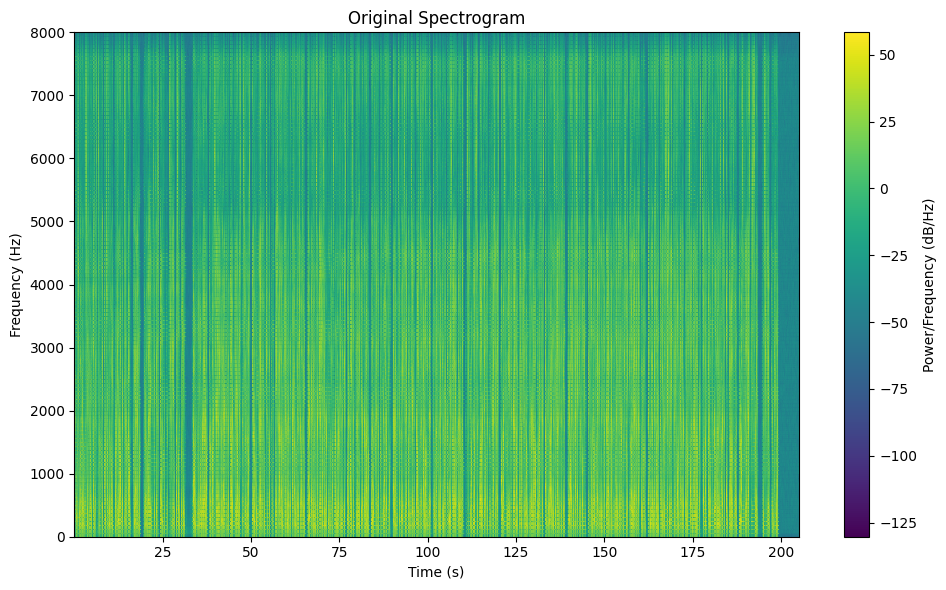

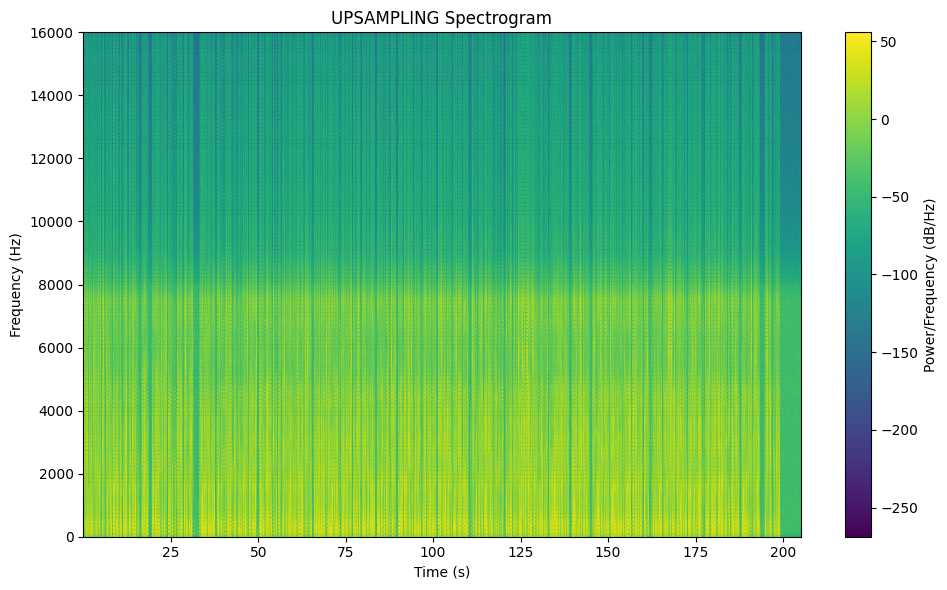

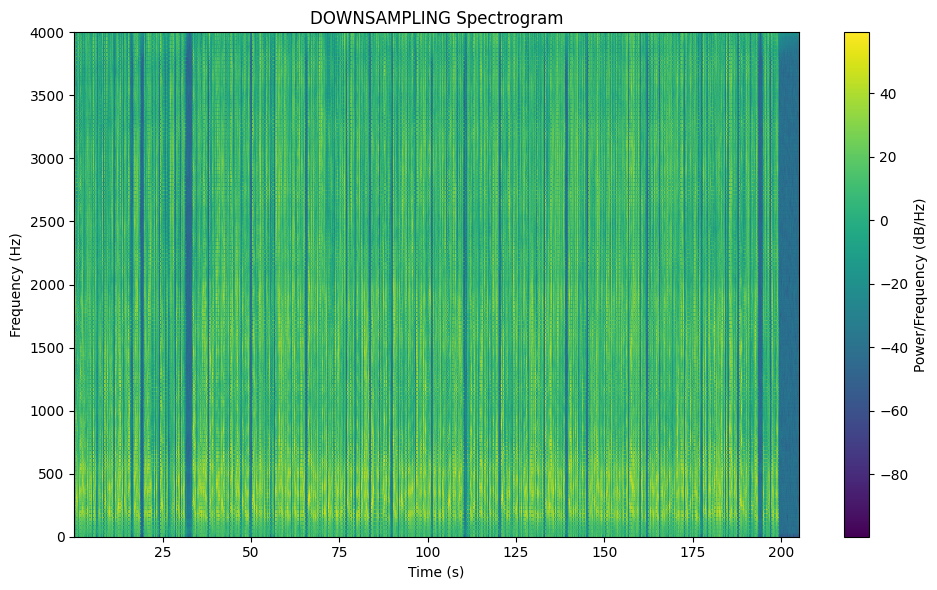

In [ ]:
def upsample(signal, original_rate, target_rate):
    upsampled_signal = scipy.signal.resample(signal, len(signal) * target_rate // original_rate)
    return upsampled_signal

def downsample(signal, original_rate, target_rate):
    downsampled_signal = scipy.signal.resample(signal, len(signal) * target_rate // original_rate)
    return downsampled_signal

def plot_spectrogram(signal, sampling_rate, title):
    frequencies, times, Sxx = scipy.signal.spectrogram(signal, sampling_rate)

    plt.figure(figsize=(10, 6))
    plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
    plt.title(title + " Spectrogram")
    plt.ylabel("Frequency (Hz)")
    plt.xlabel("Time (s)")
    plt.colorbar(label="Power/Frequency (dB/Hz)")
    plt.tight_layout()
    plt.show()


path = '/content/AUDIO_DATA/AUDIO_DATA/CLASS 1/speech-librivox-0053.wav'
original_rate, signal = scipy.io.wavfile.read(path)

target_upsampling_rate = original_rate * 2  # Example: double the rate
target_downsampling_rate = original_rate // 2  # Example: half the rate

upsampled_signal = upsample(signal, original_rate, target_upsampling_rate)
downsampled_signal = downsample(signal, original_rate, target_downsampling_rate)

plot_spectrogram(signal,original_rate,"Original")
plot_spectrogram(upsampled_signal,target_upsampling_rate,"UPSAMPLING")
plot_spectrogram(downsampled_signal,target_downsampling_rate,"DOWNSAMPLING")


OBSERVATIONS

upsampling: basically compressing the x axis of waveform aka increasing frequency
the high frequency data is now pre-dominant in the sample than original data and we can see in spectrogram that 1. the frequency has increased 2. the loudness of high frequency data has increased and loudness of low frequency data has decreased

downsampling: basically expanding the x axis of waveform aka decreasing frequency
the low frequency data is now pre-dominant in the sample than original data and we can see in spectrogram that 1. the frequency has decreased 2. the loudness of low frequency data has increased and loudness of high frequency data has decreased

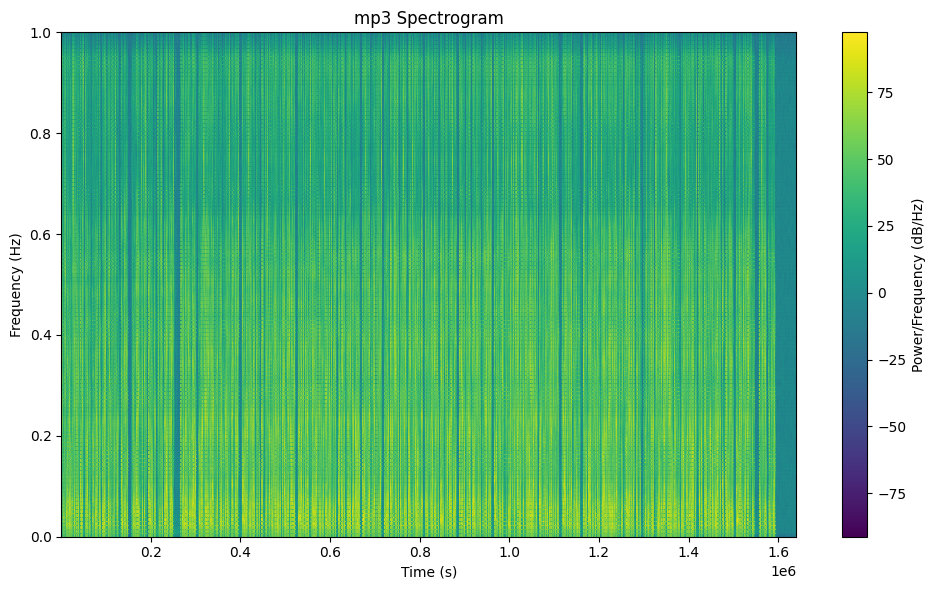

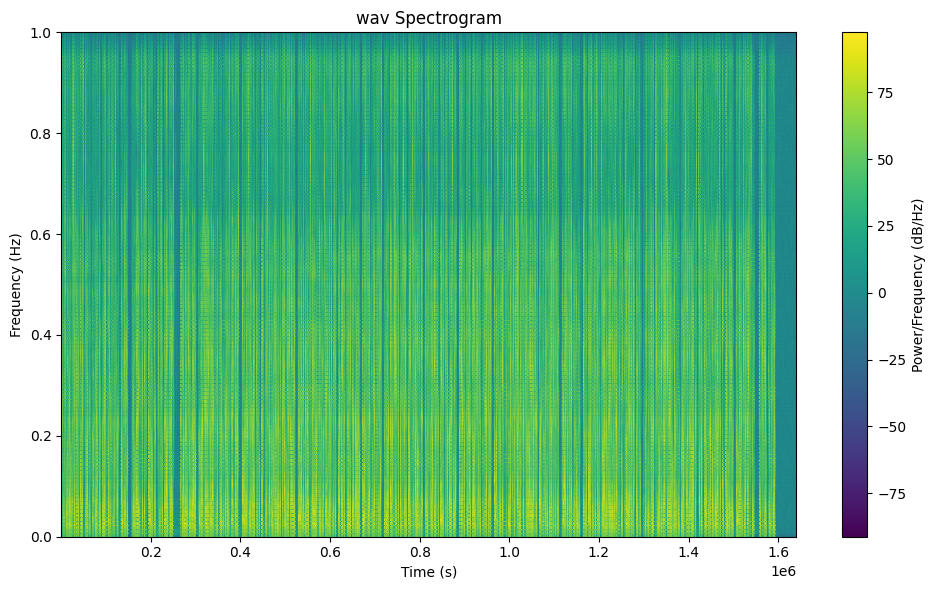

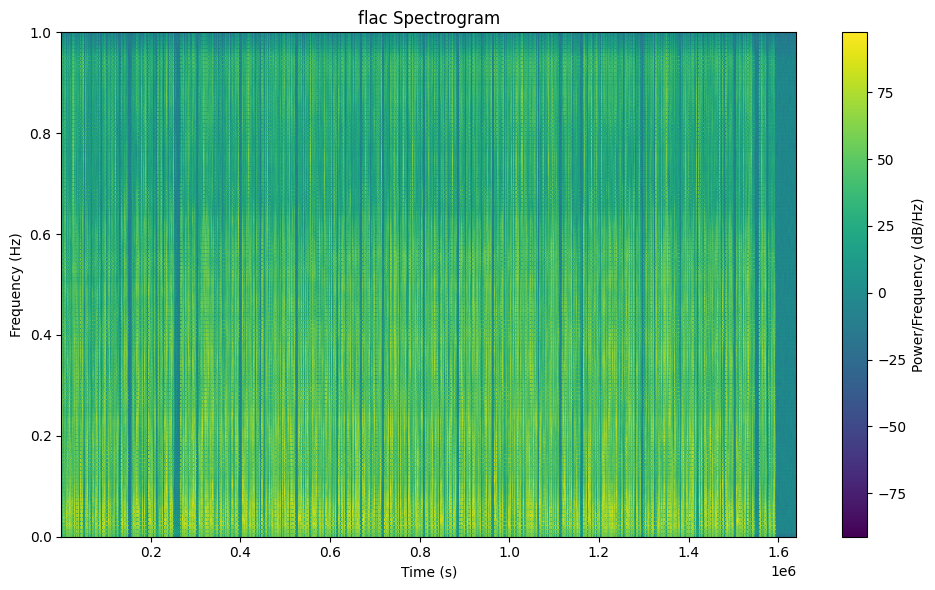

In [ ]:
file_ids = {
    'mp3': '/content/drive/MyDrive/Ml/long-buzzer-38398.mp3',
    'wav': '/content/drive/MyDrive/Ml/long-buzzer-38398.wav',
    'flac': '/content/drive/MyDrive/Ml/long-buzzer-38398.flac'
}

for keys in file_ids:
  audio, sample_rate = librosa.load(file_ids[keys], sr=None, mono=True)
  plot_spectrogram(signal,2,keys)


We can observe that the colour of mp3 spectogram is slightly darker than the other 2 (flac and wav)
While flac and wav spectrograms are similar to each other

This can be because of the fact that flac and wav datatype store the raw data of audio while mp3 file stores in compressed data of the same audio recording
